<a href="https://colab.research.google.com/github/vivekbiragoni/Deep_Learning/blob/main/pytorch/modeling/00_LinRegFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [2]:
#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

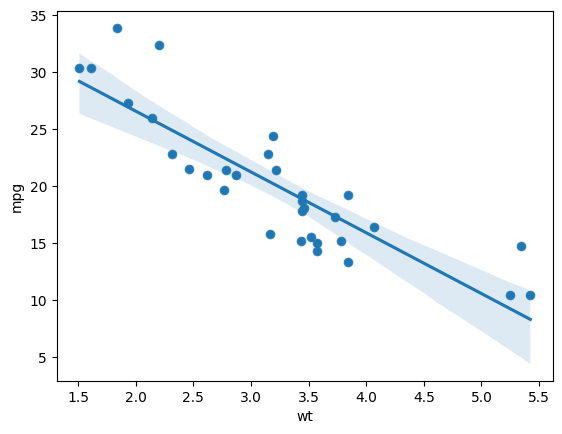

In [3]:
#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [5]:
#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [8]:
#%% training
w = torch.rand(1, requires_grad=True, dtype= torch.float32)
b = torch.rand(1, requires_grad=True, dtype= torch.float32)

num_epochs = 1000
learning_rate = 0.001


for epoch in range(num_epochs):
  for i in range(len(X)):
    # forward pass
    y_pred = X[i] *w + b
    # calculate loss
    loss_tensor = torch.pow(y_pred-y[i], 2)

    # backward pass
    loss_tensor.backward()

    # extract losses
    loss_value = loss_tensor.data[0]

    # update wts and biases
    with torch.no_grad():
      w -= w.grad*learning_rate
      b -= b.grad*learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)





tensor(148.4504)
tensor(78.2281)
tensor(53.5241)
tensor(43.6410)
tensor(39.2694)
tensor(37.1421)
tensor(35.9779)
tensor(35.2390)
tensor(34.6917)
tensor(34.2324)
tensor(33.8148)
tensor(33.4182)
tensor(33.0332)
tensor(32.6556)
tensor(32.2835)
tensor(31.9161)
tensor(31.5527)
tensor(31.1934)
tensor(30.8379)
tensor(30.4862)
tensor(30.1383)
tensor(29.7940)
tensor(29.4534)
tensor(29.1164)
tensor(28.7830)
tensor(28.4531)
tensor(28.1267)
tensor(27.8038)
tensor(27.4844)
tensor(27.1683)
tensor(26.8555)
tensor(26.5462)
tensor(26.2400)
tensor(25.9372)
tensor(25.6376)
tensor(25.3412)
tensor(25.0479)
tensor(24.7578)
tensor(24.4707)
tensor(24.1868)
tensor(23.9058)
tensor(23.6279)
tensor(23.3529)
tensor(23.0809)
tensor(22.8118)
tensor(22.5456)
tensor(22.2822)
tensor(22.0217)
tensor(21.7639)
tensor(21.5090)
tensor(21.2567)
tensor(21.0072)
tensor(20.7603)
tensor(20.5161)
tensor(20.2746)
tensor(20.0357)
tensor(19.7993)
tensor(19.5654)
tensor(19.3341)
tensor(19.1053)
tensor(18.8790)
tensor(18.6551)
tensor(

In [9]:
#%% check results
print(f"Weight: {w.item()}, Bias: { b.item()}")

Weight: -5.229808807373047, Bias: 36.806793212890625


In [16]:
y_pred = ((X*w)+b).detach().numpy()
# y_pred

<Axes: >

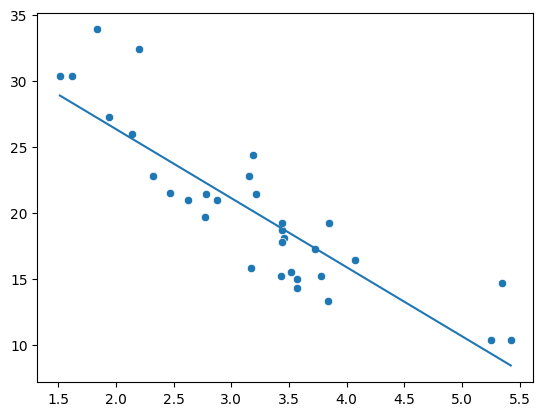

In [17]:
sns.scatterplot(x=X_list, y = y_list)
sns.lineplot(x=X_list, y = y_pred.reshape(-1))

In [18]:
# %% (Statistical) Linear Regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Intercept:{reg.intercept_}")

Slope: [-5.3444715], Intercept:37.285125732421875


In [19]:
!apt-get install -y graphviz
!pip install torchviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=bf5cbb65966630dfa1c28d1f8a7531e1f6bee91c9bdacd85ce05a76190376e0c
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


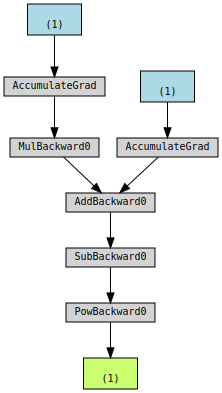

In [20]:
import os
from torchviz import make_dot
make_dot(loss_tensor)